In [1]:
# making the necessay imports 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#firing up the file and displaying some observations 
sample_c = pd.read_excel("Sample_C.xlsx", sheet_name="Data")

#firing up the firt 5 observations 
sample_c.head()

,Gender,Age,Survival
0,0,23,0
1,1,40,1
2,0,40,1
3,0,30,0
4,0,28,0


In [3]:
# getting the nature of the columns in my dataset 
sample_c.dtypes

Gender      int64
Age         int64
Survival    int64
dtype: object

In [4]:
#getting the simple summary of my dataset
sample_c.describe()

,Gender,Age,Survival
count,45.000000,45.000000,45.000000
mean,0.333333,31.800000,0.444444
std,0.476731,12.511086,0.502519
min,0.000000,15.000000,0.000000
25%,0.000000,24.000000,0.000000
50%,0.000000,28.000000,0.000000
75%,1.000000,40.000000,1.000000
max,1.000000,65.000000,1.000000


In [5]:
# constructing a multinomial logistic regression
# loading in the necessay packages 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [6]:
#saving the x and y variables for training and testing 
X = sample_c[["Gender", "Age"]]
y = sample_c[["Survival"]]

In [7]:
#splitting the dataset  into training and houldout 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
#Building the classifier and fitting the model to the data
clf = LogisticRegression().fit(X=X_train, y=y_train)

c:\Users\12508\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
# Getting the beta coefficient (slope) 
clf.coef_


array([[ 0.81119509, -0.05385423]])

In [10]:
#getting the beta coefficent intercept
clf.intercept_

array([1.27016683])

### Plotting for a multinomial Logistic regression model 


In [11]:
import numpy as np

c:\Users\12508\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


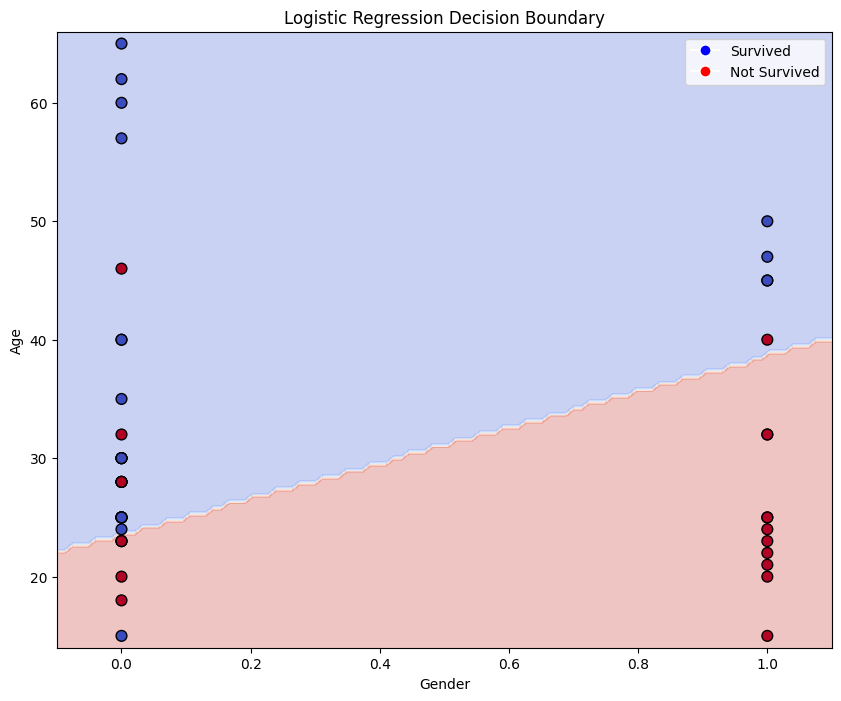

In [12]:
# Create decision boundary plot
plt.figure(figsize=(10, 8))

# Create mesh grid
x_min, x_max = sample_c['Gender'].min() - 0.1, sample_c['Gender'].max() + 0.1
y_min, y_max = sample_c['Age'].min() - 1, sample_c['Age'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                    np.linspace(y_min, y_max, 100))

# Predict on mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

# Plot data points
scatter = plt.scatter(sample_c['Gender'], sample_c['Age'], 
                    c=sample_c['Survival'], cmap='coolwarm', 
                    s=60, edgecolors='black')

plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Logistic Regression Decision Boundary')
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Survived'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Not Survived')
])
plt.show()

### Confusion Matrix

In [13]:
# splitting data into training and hold out samples 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Building  regression model 
clf = LogisticRegression().fit(X_train, y_train)

#getting preditions and saving them 
y_pred = clf.predict(X_test)

c:\Users\12508\miniconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
#printing out predicted values 
clf.predict(X_test)

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [15]:
#printing out the predicted probabilities 
clf.predict_proba(X_test)[::,-1]

array([0.48096197, 0.54812114, 0.38860767, 0.49441655, 0.58856262,
       0.35098068, 0.44084049, 0.44084049, 0.09705724, 0.41448376,
       0.41530467, 0.48096197, 0.72120025, 0.14190897])

### Creating a confusion matrix 

In [16]:
#importing the necessary packages 
import sklearn.metrics as metrics

In [17]:
# calculating the values for each quadrant in the confusion matrix
cm = metrics. confusion_matrix(y_test, y_pred, labels=clf.classes_)

In [18]:
#creating a confusion matrix as a visualization 
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

In order to understand and interpret the numbers in the below confusion matrix, it is important to keep the following in mind:

* The upper-left quadrant displays the number of **true negatives**.
* The bottom-left quadrant displays the number of **false negatives**.
* The upper-right quadrant displays the number of **false positives**.
* The bottom-right quadrant displays the number of **true positives**.

We can define the above bolded terms as follows in our given context:
* **True negatives**: The number of people that DIED that the model accurately predicted DIED.
* **False negatives**: The number of people that SURVIVED that the model inaccurately predicted DIED.
* **False positives**: The number of people that DIED that the model inaccurately predicted SURVIVED.
* **True positives**: The number of people that SURVIVED that the model accurately predicted SURVIVED.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

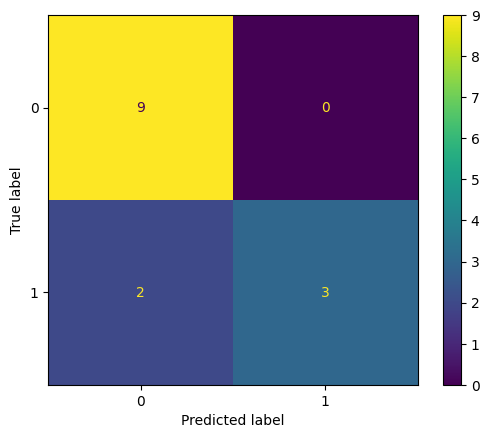

In [19]:
# Displaying the confusion matrix 
disp.plot()

#showing the plot
plt.show()